<a href="https://colab.research.google.com/github/JakeOh/202511_BD53/blob/main/lab_ml/ml08_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

(주의) 분류 알고리즘

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

# 데이터 셋

In [2]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [3]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


물고기의 모든 특성을 사용한 이진 분류(Bream vs Smelt)

In [4]:
df = fish[fish.Species.isin(['Bream', 'Smelt'])]

In [5]:
df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [6]:
df.tail()

,Species,Weight,Length,Diagonal,Height,Width
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,15.0,16.2,2.9322,1.8792


In [7]:
x = df[df.columns[1:]].values  # 특성 배열
y = df['Species'].values  # 타겟 배열

## 훈련/테스트 나누기

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

# Logistic Regresseion

## 모델 훈련

In [9]:
# 표준화 + Logistic 분류 -> 파이프라인
pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('clf', LogisticRegression(random_state=42))])

In [10]:
# ML 모델 훈련
pipe.fit(X=x_train, y=y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', LogisticRegression(random_state=42))])

In [11]:
pipe['scaler'].mean_  #> 훈련 셋 물고기 5개 특성(we, l, d, h, wi)의 평균

array([441.98333333,  26.93333333,  31.01944444,  11.50641389,
         4.26155   ])

In [12]:
pipe['scaler'].var_  #> 훈련 셋 물고기 5개 특성의 분산

array([1.06023830e+05, 1.01836667e+02, 1.41404900e+02, 3.66338767e+01,
       3.76707020e+00])

In [13]:
pipe['clf'].coef_  #> 물고기 5개 특성 변수들 앞에 곱해주는 계수들(기울기)

array([[-0.55506377, -0.7878406 , -0.82200554, -0.85621658, -0.80176239]])

In [14]:
pipe['clf'].intercept_  #> 선형회귀식의 절편

array([-2.70008196])

## 모델 평가

### 훈련 셋 평가

In [15]:
# 훈련 셋 예측값
train_pred = pipe.predict(X=x_train)
train_pred

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream'], dtype=object)

In [16]:
y_train  # 훈련 셋 실젯값

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream'], dtype=object)

In [17]:
train_pred_prob = pipe.predict_proba(X=x_train)
train_pred_prob[:7]
#> (n_smaples, 2) shape의 2차원 배열
#> [도미(Bream)일 확률, 빙어(Smelt)일 확률]을 아이템으로 갖는 2차원 배열.

array([[9.97290326e-01, 2.70967369e-03],
       [9.58966545e-01, 4.10334547e-02],
       [4.27098857e-02, 9.57290114e-01],
       [9.84081674e-01, 1.59183261e-02],
       [4.23755420e-02, 9.57624458e-01],
       [9.99167839e-01, 8.32161290e-04],
       [4.52187270e-02, 9.54781273e-01]])

In [18]:
# 훈련 셋 혼동 행렬
cm_train = confusion_matrix(y_true=y_train, y_pred=train_pred)
cm_train

array([[26,  0],
       [ 0, 10]])

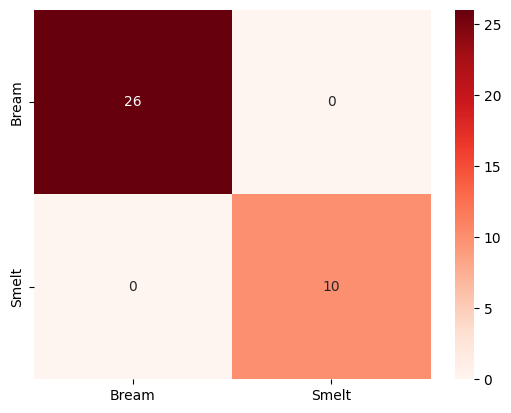

In [19]:
labels= ['Bream', 'Smelt']
sns.heatmap(data=cm_train, cmap='Reds', annot=True,
            xticklabels=labels, yticklabels=labels)
plt.show()

### 테스트 셋 평가

In [20]:
# 테스트 셋 예측 확률들
test_pred_prob = pipe.predict_proba(X=x_test)
test_pred_prob[:6]

array([[9.97327377e-01, 2.67262321e-03],
       [9.94421467e-01, 5.57853296e-03],
       [9.99430914e-01, 5.69085665e-04],
       [1.02243774e-01, 8.97756226e-01],
       [5.42736495e-02, 9.45726351e-01],
       [9.93085855e-01, 6.91414509e-03]])

In [21]:
# 테스트 셋 예측값
test_pred = pipe.predict(X=x_test)
test_pred[:6]

array(['Bream', 'Bream', 'Bream', 'Smelt', 'Smelt', 'Bream'], dtype=object)

In [22]:
# 테스트 셋 혼동 행렬
cm_test = confusion_matrix(y_true=y_test, y_pred=test_pred)
cm_test

array([[9, 0],
       [0, 4]])

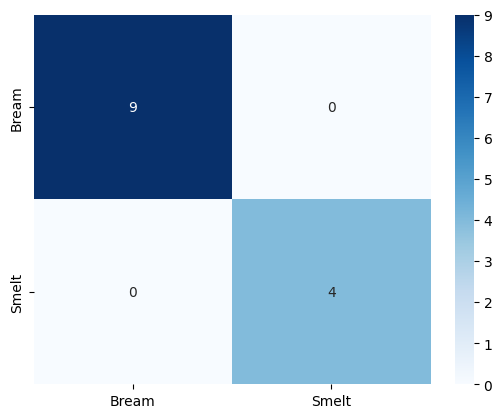

In [23]:
sns.heatmap(data=cm_test, cmap='Blues', annot=True,
            xticklabels=labels, yticklabels=labels)
plt.show()

# Sigmoid(Logistic) 함수

$$
\phi(z) = \dfrac{e^z}{e^z + 1} = \dfrac{1}{1 + e^{-z}}
$$

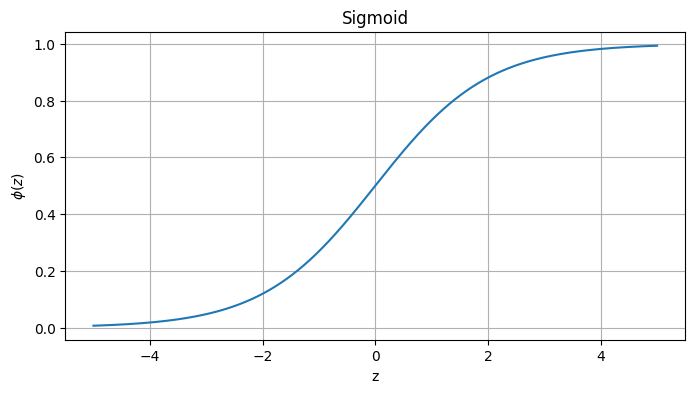

In [26]:
z = np.arange(-5, 5, 0.0001)
sigmoid = 1 / (1 + np.exp(-z))

plt.figure(figsize=(8, 4))
plt.plot(z, sigmoid)
plt.grid()
plt.title('Sigmoid')
plt.xlabel('z')
plt.ylabel(r'$\phi(z)$')
plt.show()

## Logistic Regression